<a href="https://colab.research.google.com/github/MiscMissLA/Mini-Project-09-Select-any-dataset-from-UCI-Dataset-Repository-and-Perform-EDA/blob/main/Solution_PerformEDA_On_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
pip install ucimlrepo

In [72]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
x = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [74]:
x.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [88]:
# outliers
q1 = x.Hue.quantile(0.75)
q3 = x.Hue.quantile(0.25)
iqr = q1  - q3
print(iqr)
x.Hue[(x.Hue > q3 + 1.5*iqr) | (x.Hue < q1 - 1.5*iqr)]

0.33750000000000013


,Hue
64,1.45
71,1.36
73,1.31
80,1.38
82,1.31
86,1.33
87,1.36
99,1.42
115,1.71
145,0.60


In [17]:
x.head(10)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [18]:
x.tail(15)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.280000,0.68,1.75,675
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.580000,0.70,1.68,615
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.680000,0.85,1.56,695
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.260000,0.72,1.75,685
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660


In [16]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [19]:
x.dtypes

,0
Alcohol,float64
Malicacid,float64
Ash,float64
Alcalinity_of_ash,float64
Magnesium,int64
Total_phenols,float64
Flavanoids,float64
Nonflavanoid_phenols,float64
Proanthocyanins,float64
Color_intensity,float64


In [21]:
y.dtypes

,0
class,int64


In [23]:
x.shape

(178, 13)

In [24]:
duplicated_x = x[x.duplicated()]
print('The number of duplicate rows are: ', duplicated_x.shape[0])

The number of duplicate rows are:  0


In [26]:
x.count()

,0
Alcohol,178
Malicacid,178
Ash,178
Alcalinity_of_ash,178
Magnesium,178
Total_phenols,178
Flavanoids,178
Nonflavanoid_phenols,178
Proanthocyanins,178
Color_intensity,178


In [27]:
x.drop_duplicates()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
x.count()

,0
Alcohol,178
Malicacid,178
Ash,178
Alcalinity_of_ash,178
Magnesium,178
Total_phenols,178
Flavanoids,178
Nonflavanoid_phenols,178
Proanthocyanins,178
Color_intensity,178


In [30]:
x.isnull().sum()

,0
Alcohol,0
Malicacid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0
Color_intensity,0


In [40]:
x = x.dropna()
x.count()

,0
Alcohol,178
Malicacid,178
Ash,178
Alcalinity_of_ash,178
Magnesium,178
Total_phenols,178
Flavanoids,178
Nonflavanoid_phenols,178
Proanthocyanins,178
Color_intensity,178


In [41]:
print(x.isnull().sum())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


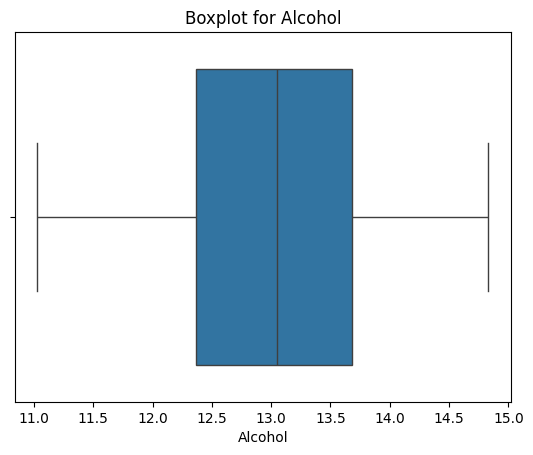

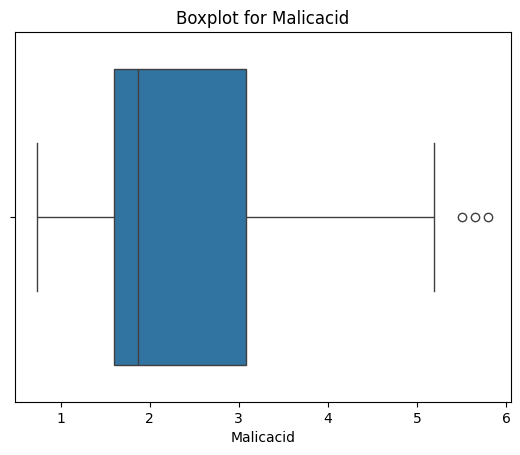

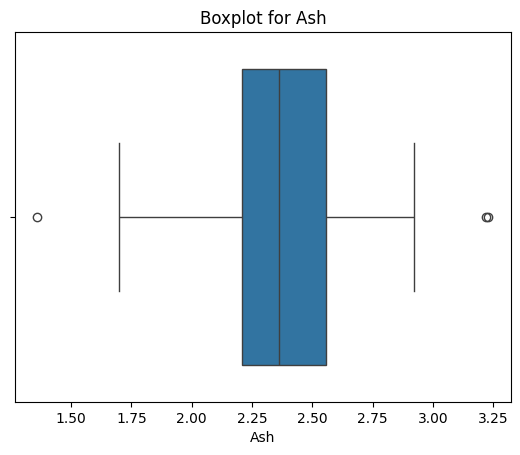

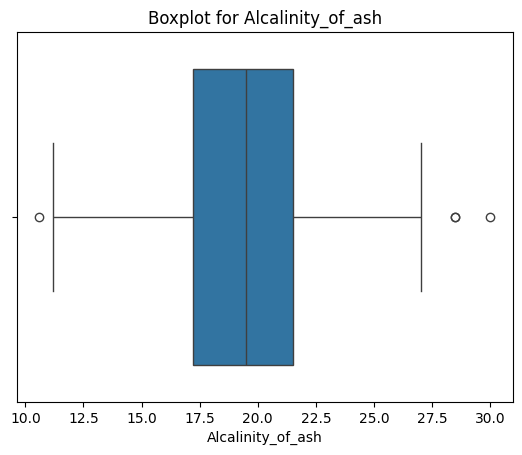

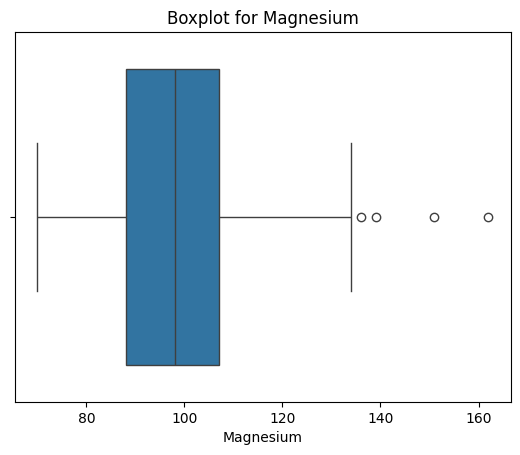

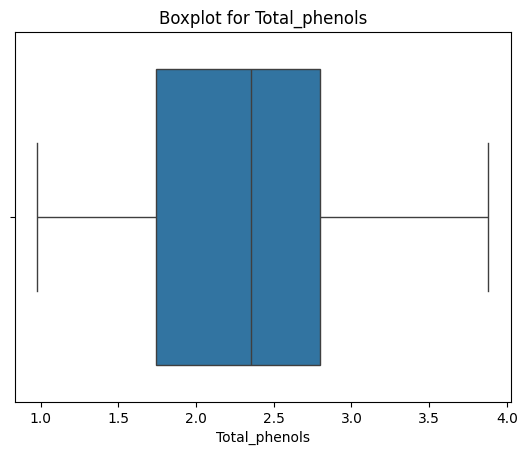

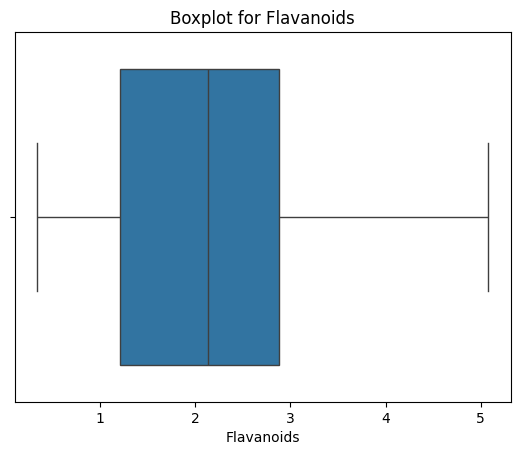

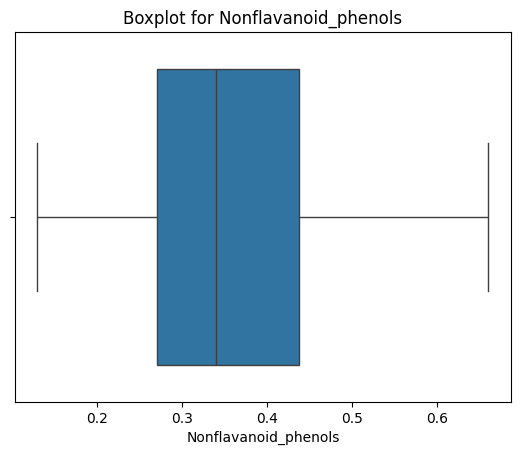

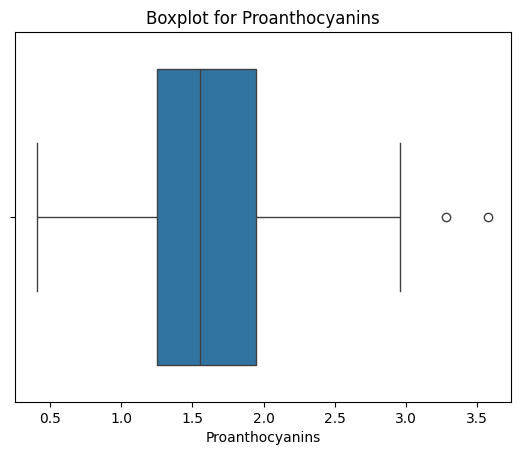

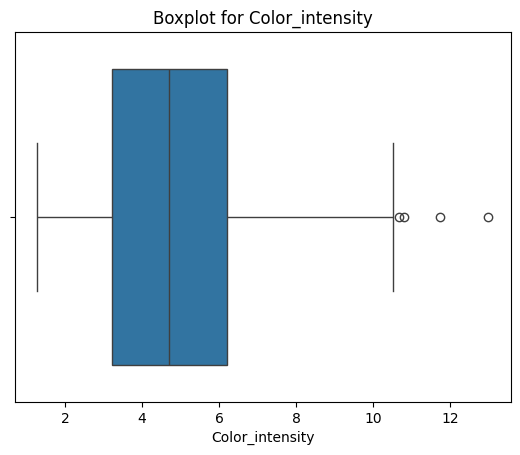

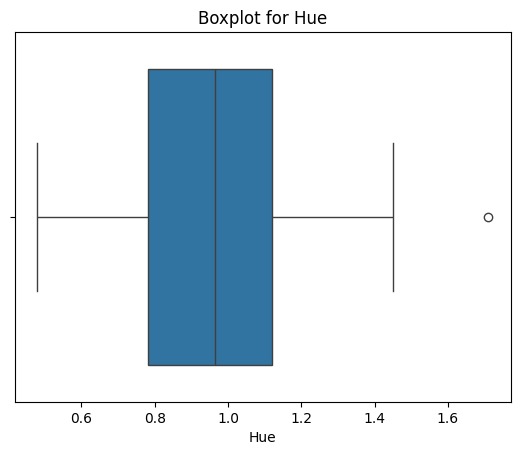

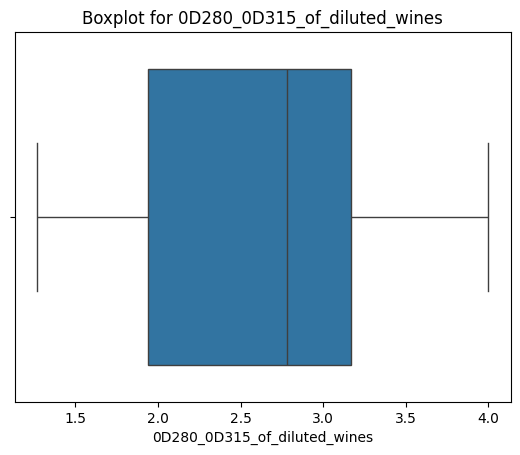

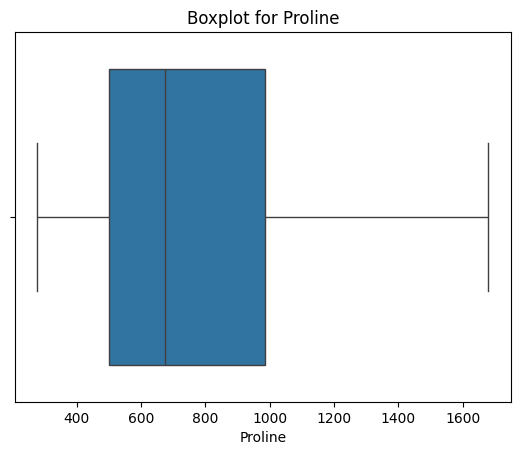

In [46]:
for i in list(x.columns):
  sns.boxplot(x = x[i])
  plt.title('Boxplot for '+i)
  plt.show()

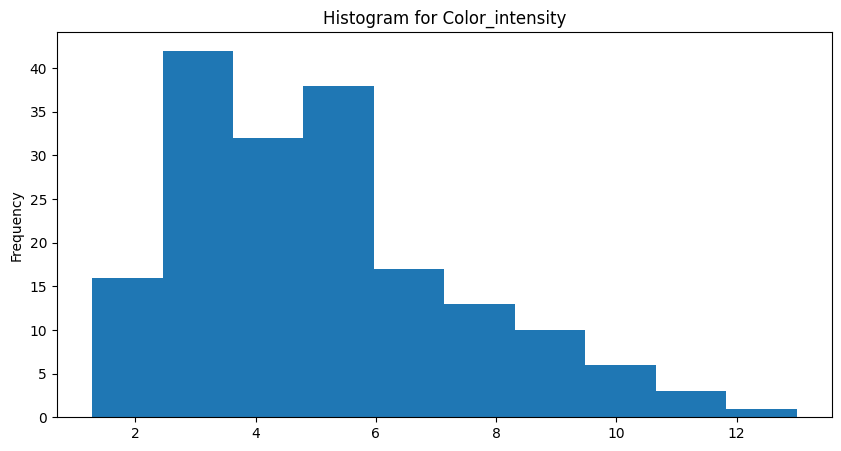

In [52]:
x.Color_intensity.plot(kind = 'hist', figsize = (10,5))
plt.title('Histogram for Color_intensity')
plt.show()

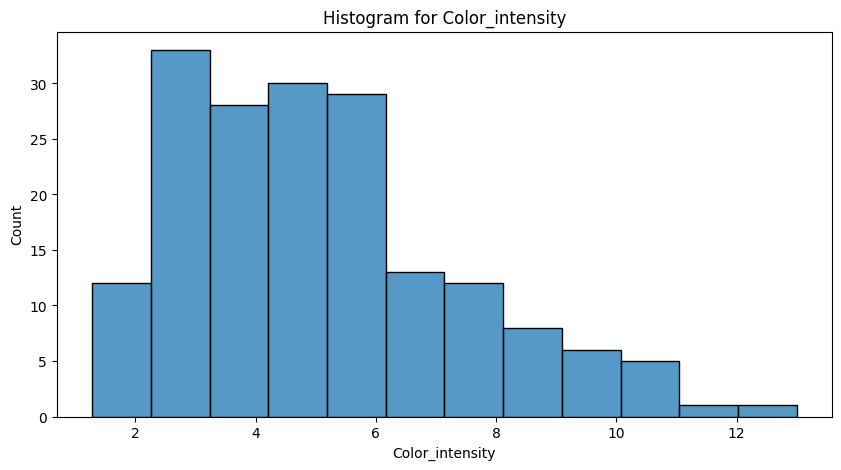

In [51]:
plt.figure(figsize = (10,5))
fig = sns.histplot(x.Color_intensity)
fig.set_title('Histogram for Color_intensity')
plt.show()


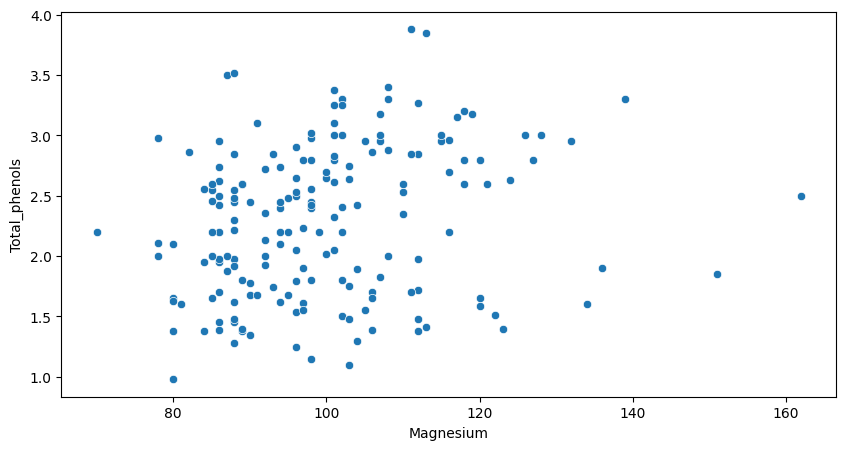

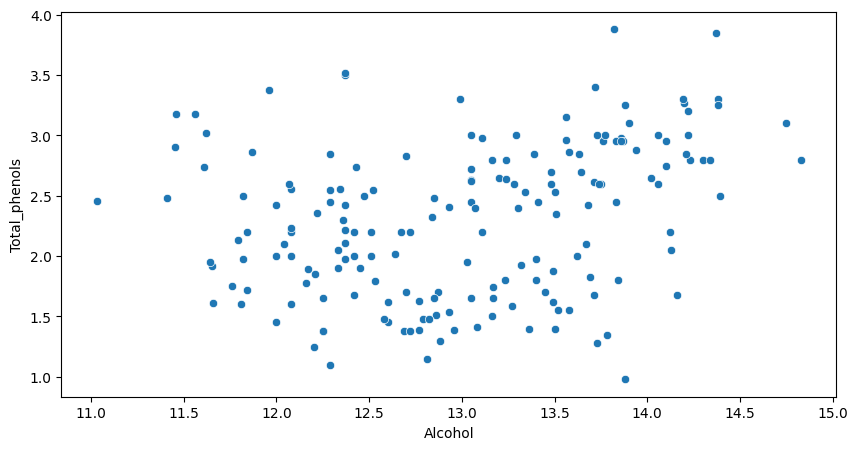

In [61]:
plt.figure(figsize = (10,5))
fig = sns.scatterplot(x = x.Magnesium, y = x.Total_phenols)
plt.show()
plt.figure(figsize = (10,5))
fig = sns.scatterplot(x = x['Alcohol'], y = x['Total_phenols'])
plt.show()


<Axes: xlabel='Flavanoids', ylabel='0D280_0D315_of_diluted_wines'>

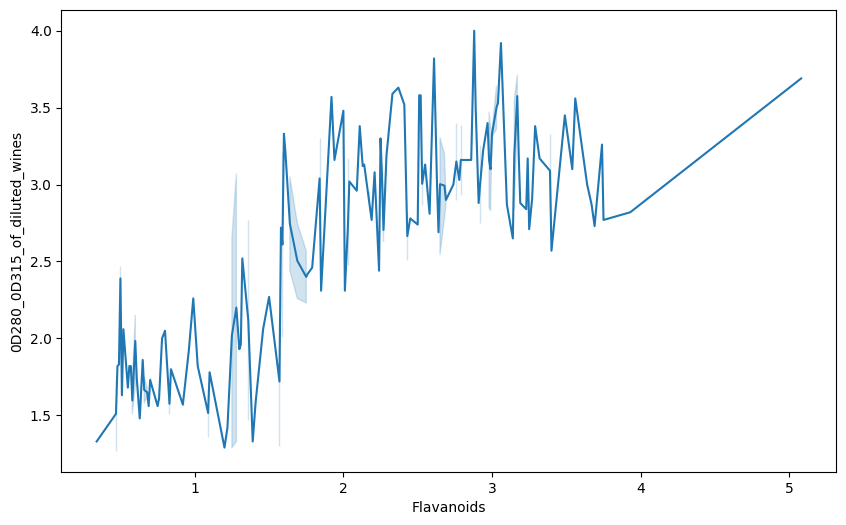

In [62]:
plt.figure(figsize=(10,6))
sns.lineplot(x = x['Flavanoids'],y = x['0D280_0D315_of_diluted_wines'])

<Axes: >

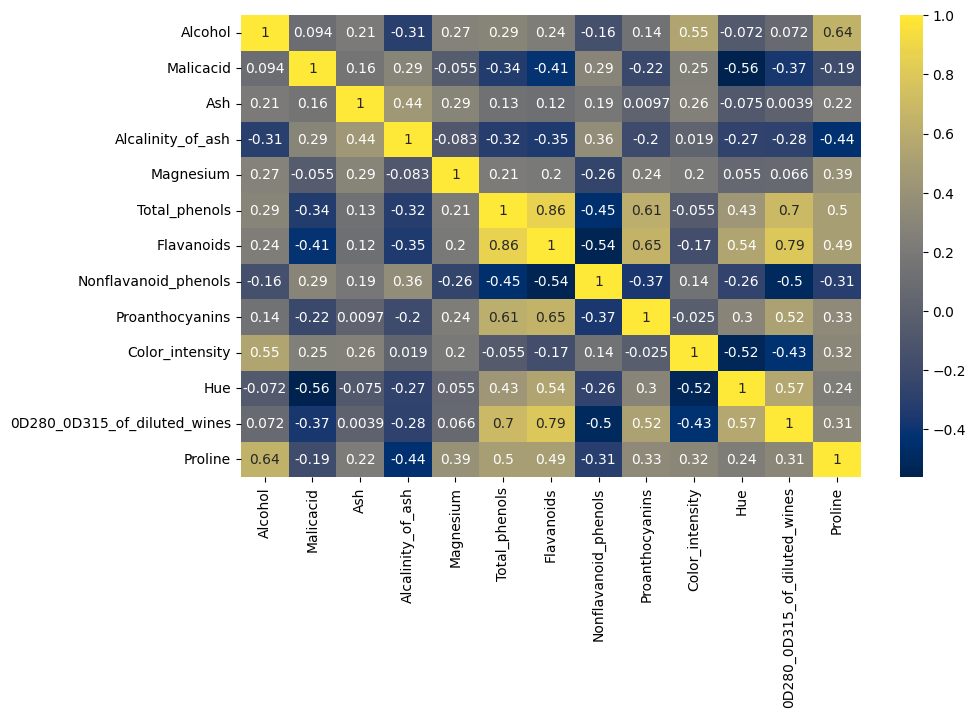

In [71]:
plt.figure(figsize = (10,6))
c = x.corr(numeric_only = True)
sns.heatmap(c, cmap = "cividis", annot = True)